In [1]:
import pandas as pd
import seaborn
seaborn.set_style("darkgrid")
import missingno as msng
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('LoansTrainingSet.csv')


now we look at what we have in dataset

In [3]:
df.shape

(256984, 19)

In [4]:
df.describe(include='all')

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
count,256984,256984,256984,2.569840e+05,256984,195308.000000,245508,256984,1.953080e+05,256984,256984,256984.000000,116601.000000,256984.000000,256984.000000,2.569840e+05,256984.0,256455.000000,256961.000000
unique,215700,215700,2,NaN,2,NaN,11,4,NaN,10,129115,NaN,NaN,NaN,NaN,NaN,87188.0,NaN,NaN
top,16af49e2-5d1a-4b74-88ce-12418bc7dd98,3ad322aa-d16e-4b18-9392-ea1efb95728e,Fully Paid,NaN,Short Term,NaN,10+ years,Home Mortgage,NaN,Debt Consolidation,$0.00,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
freq,4,4,176191,NaN,192632,NaN,78896,124477,NaN,203911,254,NaN,NaN,NaN,NaN,NaN,1597.0,NaN,NaN
mean,NaN,NaN,NaN,1.371331e+07,NaN,1251.116099,NaN,NaN,7.195272e+04,NaN,NaN,18.290195,34.881450,11.106267,0.156628,1.540656e+04,NaN,0.110316,0.027203
std,NaN,NaN,NaN,3.438131e+07,NaN,1762.016848,NaN,NaN,5.887757e+04,NaN,NaN,7.075747,21.854165,4.982982,0.460731,1.966506e+04,NaN,0.336229,0.245950
min,NaN,NaN,NaN,5.050000e+02,NaN,585.000000,NaN,NaN,0.000000e+00,NaN,NaN,3.400000,0.000000,0.000000,0.000000,0.000000e+00,NaN,0.000000,0.000000
25%,NaN,NaN,NaN,8.299000e+03,NaN,714.000000,NaN,NaN,4.432100e+04,NaN,NaN,13.500000,16.000000,8.000000,0.000000,5.974000e+03,NaN,0.000000,0.000000
50%,NaN,NaN,NaN,1.429800e+04,NaN,733.000000,NaN,NaN,6.124200e+04,NaN,NaN,17.000000,32.000000,10.000000,0.000000,1.107800e+04,NaN,0.000000,0.000000
75%,NaN,NaN,NaN,2.436700e+04,NaN,744.000000,NaN,NaN,8.646200e+04,NaN,NaN,21.700000,51.000000,14.000000,0.000000,1.931900e+04,NaN,0.000000,0.000000


In [5]:
df.sample(5)

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
114585,71d3d5c8-4ad8-4e7e-9d6f-622f3a4c8cf7,922fcca2-eaaa-4e75-ac75-9c73bf9e485a,Fully Paid,5989,Short Term,708.0,NaN,Home Mortgage,59892.0,Debt Consolidation,"$1,327.61",17.0,27.0,11,0,3580,13767,0.0,0.0
36206,240f2d79-1a44-4cf3-9b21-15394c98bb46,c2171916-a9e9-4a0d-b1b5-45359ec36f9a,Charged Off,16154,Long Term,724.0,3 years,Home Mortgage,46442.0,Debt Consolidation,$824.34,15.2,72.0,9,0,31612,33809,0.0,0.0
153667,98cfb48e-d5e6-43bf-85d5-7536c9898b78,fde8b6dd-ef73-4d20-8f65-b40333536585,Fully Paid,7882,Short Term,750.0,2 years,Home Mortgage,49265.0,Debt Consolidation,$853.93,29.4,NaN,11,0,10564,41107,0.0,0.0
30637,1ea90ddd-4107-4e5e-a8ff-f42ec33ea811,a0128ff2-455b-4710-a1d0-61abf9b007bd,Charged Off,5918,Short Term,7460.0,1 year,Home Mortgage,50301.0,Medical Bills,$544.93,16.2,NaN,6,0,3516,4341,0.0,0.0
193227,c02915e1-21e1-496d-b3e5-49372ec0f7a2,b24a07d4-d332-4144-9df2-30183e52d364,Fully Paid,9010,Short Term,731.0,10+ years,Home Mortgage,99318.0,Debt Consolidation,"$2,623.66",22.6,NaN,16,0,68288,87774,0.0,0.0


In [6]:
df.isnull().sum()

Loan ID                              0
Customer ID                          0
Loan Status                          0
Current Loan Amount                  0
Term                                 0
Credit Score                     61676
Years in current job             11476
Home Ownership                       0
Annual Income                    61676
Purpose                              0
Monthly Debt                         0
Years of Credit History              0
Months since last delinquent    140383
Number of Open Accounts              0
Number of Credit Problems            0
Current Credit Balance               0
Maximum Open Credit                  0
Bankruptcies                       529
Tax Liens                           23
dtype: int64

In [7]:
# loan id is useless so
# customer id is useless
df = df.drop('Loan ID',axis=1)
df = df.drop('Customer ID',axis=1)


In [8]:
loan_status_table = pd.crosstab(index=df['Loan Status'], columns=[df['Term']], normalize='columns')
loan_status_table

Term,Long Term,Short Term
Loan Status,,
Charged Off,0.462037,0.265065
Fully Paid,0.537963,0.734935


In [9]:
current_loan_amount_table = pd.crosstab(index=df['Current Loan Amount'], columns=[df['Loan Status']], normalize='columns')
current_loan_amount_table

Loan Status,Charged Off,Fully Paid
Current Loan Amount,,
505,0.0,0.000006
511,0.0,0.000006
701,0.0,0.000006
768,0.0,0.000006
809,0.0,0.000006
...,...,...
35875,0.0,0.000034
37540,0.0,0.000006
39304,0.0,0.000006


In [10]:
# here we see all the current amonts written as 9999999 are actually paid so we replace them with zero

In [11]:
# loan status is the important part
df['Loan Status'] = df['Loan Status'].replace('Fully Paid',1).replace('Charged Off',0).astype(int)  

In [12]:
df['Current Loan Amount']=df['Current Loan Amount'].astype('str')
df['Current Loan Amount'] = df['Current Loan Amount'].str.replace('99999999', '0').astype('int')

In [13]:
df.sample(6)

,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
78621,1,11960,Short Term,725.0,1 year,Rent,45848.0,Debt Consolidation,$298.01,33.5,12.0,9,0,2440,4185,0.0,0.0
38546,1,16381,Long Term,NaN,4 years,Home Mortgage,NaN,Debt Consolidation,$930.97,11.4,37.0,15,0,0,0,0.0,0.0
247705,1,6013,Short Term,744.0,2 years,Home Mortgage,56118.0,Debt Consolidation,"$1,220.56",14.9,28.0,7,0,14360,20254,0.0,0.0
118259,1,21510,Long Term,606.0,10+ years,Home Mortgage,270408.0,Home Improvements,$502.51,25.8,48.0,6,0,22024,23505,0.0,0.0
101599,1,0,Short Term,734.0,8 years,Home Mortgage,97251.0,Debt Consolidation,"$1,191.32",20.7,7.0,12,0,9292,9991,0.0,0.0
8578,1,15303,Short Term,744.0,10+ years,Home Mortgage,45909.0,Debt Consolidation,$149.97,20.9,42.0,10,0,5686,14692,0.0,0.0


In [14]:
df['Term'].unique()


array(['Short Term', 'Long Term'], dtype=object)

In [15]:
#Term
df_te = pd.get_dummies(df['Term'], drop_first = False)
df[['Long Term','Short Term']] = df_te
df = df.drop('Term',axis=1)

In [16]:
df.sample(6)

,Loan Status,Current Loan Amount,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Long Term,Short Term
103780,1,18328,751.0,10+ years,Home Mortgage,54886.0,Debt Consolidation,"$1,010.81",18.0,NaN,17,0,10371,64021,0.0,0.0,0,1
5269,1,9762,740.0,7 years,Rent,63453.0,Debt Consolidation,$597.51,16.7,43.0,8,0,16551,24304,0.0,0.0,0,1
3114,1,13703,713.0,10+ years,Home Mortgage,104545.0,Debt Consolidation,$718.75,18.8,NaN,14,1,13574,18269,0.0,1.0,0,1
123945,0,20108,6870.0,10+ years,Rent,60324.0,Debt Consolidation,"$1,301.99",16.0,72.0,10,0,13462,16892,0.0,0.0,1,0
119158,1,9886,747.0,6 years,Home Mortgage,370725.0,Home Improvements,"$1,510.71",29.4,NaN,4,0,689,14979,0.0,0.0,0,1
1032,0,7695,727.0,5 years,Rent,41433.0,Debt Consolidation,$318.69,12.7,57.0,10,1,6253,9562,0.0,0.0,0,1


<AxesSubplot:>

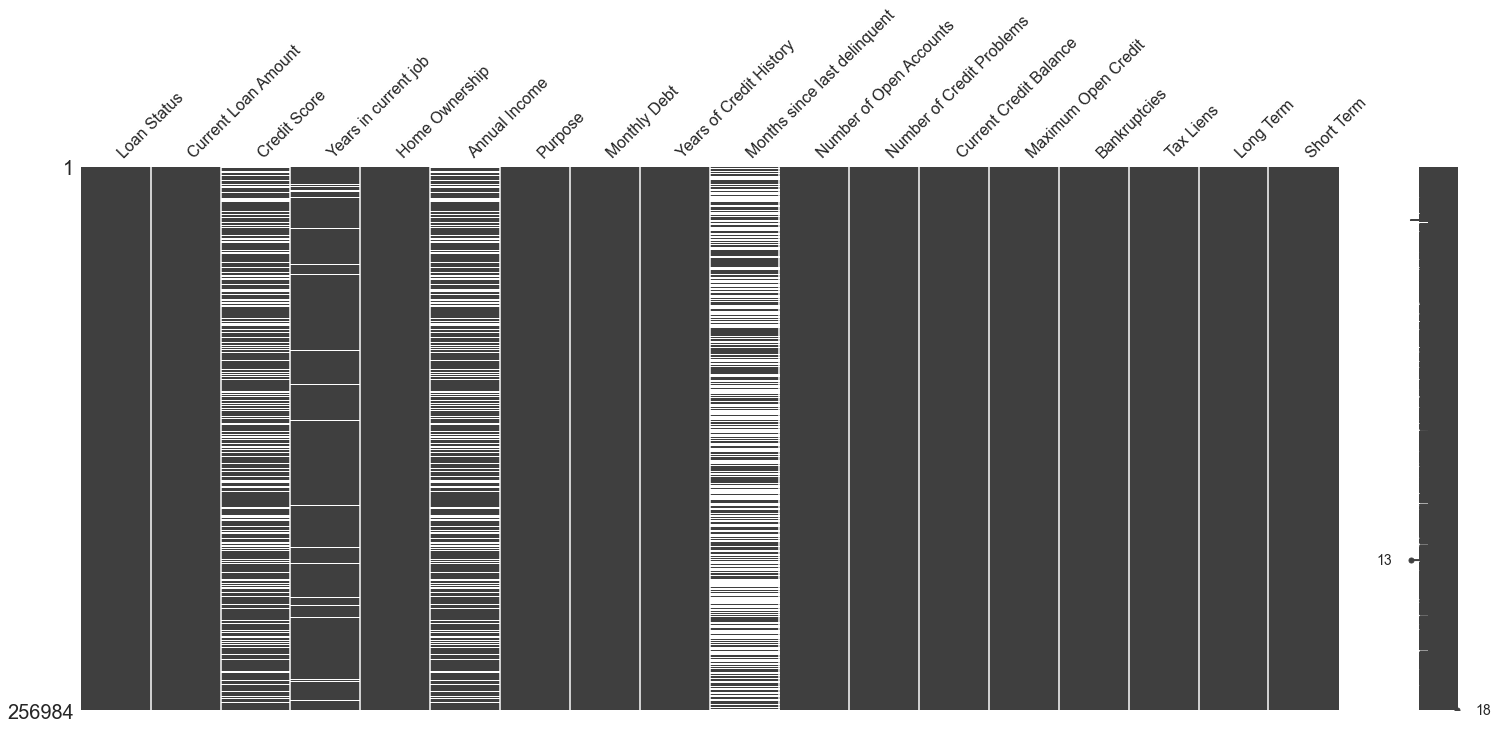

In [17]:
msng.matrix(df)

<AxesSubplot:xlabel='Credit Score'>

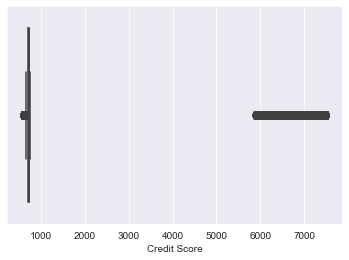

In [18]:
sns.boxplot('Credit Score',data=df)


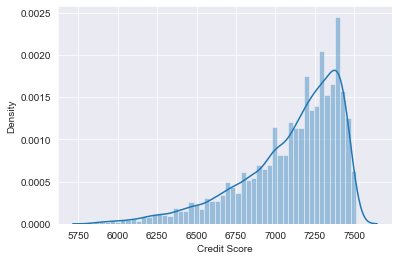

In [19]:
credit = df[~df['Credit Score'].isnull()]
invalid_cred = credit[credit['Credit Score']>850]
sns.distplot(invalid_cred['Credit Score'])
df['Credit Score'] = df['Credit Score'].apply(lambda x: x/10 if x > 850 else x)

<AxesSubplot:xlabel='Credit Score'>

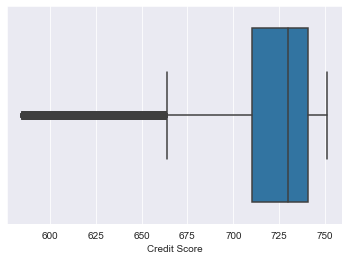

In [20]:
sns.boxplot('Credit Score',data=df)


In [21]:
df.sample(4)

,Loan Status,Current Loan Amount,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Long Term,Short Term
80141,1,0,748.0,10+ years,Rent,62688.0,Debt Consolidation,$748.08,20.9,NaN,6,0,0,0,0.0,0.0,0,1
203934,0,12464,705.0,10+ years,Rent,55395.0,Other,$223.43,12.5,NaN,8,0,8054,10106,0.0,0.0,1,0
186598,1,35056,743.0,10+ years,Home Mortgage,168269.0,Debt Consolidation,"$2,481.96",21.4,NaN,20,0,45599,105309,0.0,0.0,0,1
166191,1,0,733.0,2 years,Home Mortgage,64513.0,Debt Consolidation,"$1,295.63",10.0,NaN,19,0,12123,35448,0.0,0.0,0,1


In [22]:
df['Credit Score'] = df['Credit Score'].fillna(df['Credit Score'].median())

In [23]:
df['Purpose'].unique()

array(['Debt Consolidation', 'other', 'Business Loan',
       'Home Improvements', 'Buy House', 'Other', 'Buy a Car',
       'Medical Bills', 'Take a Trip', 'Educational Expenses'],
      dtype=object)

In [24]:
df['Purpose'] = df['Purpose'].replace('other', 'Other')

In [25]:
# Years in current job
df = df.replace({"10+ years":11,"2 years":2,"< 1 year":0.5, "3 years":3,"5 years":5,"1 year":1,"4 years":4,"6 years":6,"7 years":7,"8 years":8,"9 years":9})
df["Years in current job"].fillna(df["Years in current job"].median(), inplace = True)

In [26]:
df.sample(3)

,Loan Status,Current Loan Amount,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Long Term,Short Term
100892,1,19131,730.0,2.0,Rent,NaN,Debt Consolidation,"$1,002.08",9.7,31.0,17,1,10243,25998,0.0,0.0,0,1
125910,0,10253,730.0,4.0,Own Home,NaN,Other,"$1,776.99",9.0,27.0,11,0,1413,15700,0.0,0.0,0,1
83907,1,7574,746.0,5.0,Own Home,26259.0,Debt Consolidation,$468.50,25.0,NaN,5,0,9298,25973,0.0,0.0,0,1


In [27]:

df['Home Ownership'].unique()

array(['Home Mortgage', 'Own Home', 'Rent', 'HaveMortgage'], dtype=object)

In [28]:
df['Home Ownership'] = df['Home Ownership'].replace('HaveMortgage', 'Home Mortgage')

In [29]:
df['Annual Income'] = df['Annual Income'].fillna(df['Annual Income'].median())

In [30]:
df.corr()

,Loan Status,Current Loan Amount,Credit Score,Years in current job,Annual Income,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Bankruptcies,Tax Liens,Long Term,Short Term
Loan Status,1.000000,-0.200307,0.230681,0.005920,0.061182,0.035548,0.023541,-0.020787,-0.010179,0.008838,0.001154,-0.012585,-0.183811,0.183811
Current Loan Amount,-0.200307,1.000000,-0.178342,0.086962,0.193923,0.111399,-0.034644,0.159637,-0.058852,0.252064,-0.078563,0.011569,0.356352,-0.356352
Credit Score,0.230681,-0.178342,1.000000,-0.015719,-0.001477,0.073757,0.039281,-0.037281,-0.050191,-0.013422,-0.037534,-0.023943,-0.420506,0.420506
Years in current job,0.005920,0.086962,-0.015719,1.000000,0.062972,0.215680,-0.009668,0.047684,0.038782,0.093392,0.041213,0.007247,0.067962,-0.067962
Annual Income,0.061182,0.193923,-0.001477,0.062972,1.000000,0.127514,-0.051433,0.121719,-0.011667,0.243182,-0.038788,0.033601,0.055675,-0.055675
Years of Credit History,0.035548,0.111399,0.073757,0.215680,0.127514,1.000000,-0.039695,0.128033,0.061251,0.201001,0.062049,0.020915,0.035773,-0.035773
Months since last delinquent,0.023541,-0.034644,0.039281,-0.009668,-0.051433,-0.039695,1.000000,-0.035803,0.088612,-0.024292,0.112907,0.002730,-0.012107,0.012107
Number of Open Accounts,-0.020787,0.159637,-0.037281,0.047684,0.121719,0.128033,-0.035803,1.000000,-0.013731,0.222763,-0.022805,0.005754,0.080506,-0.080506
Number of Credit Problems,-0.010179,-0.058852,-0.050191,0.038782,-0.011667,0.061251,0.088612,-0.013731,1.000000,-0.103814,0.755866,0.584917,-0.019326,0.019326
Current Credit Balance,0.008838,0.252064,-0.013422,0.093392,0.243182,0.201001,-0.024292,0.222763,-0.103814,1.000000,-0.117995,-0.011118,0.090077,-0.090077


In [31]:
df['Maximum Open Credit'].sample(20)


197490      7458
225077      8136
75809       9889
195988      7433
28718      20403
113224     31643
203117    101651
113453     18299
187275     14103
221023      4885
104086      9064
117419     17175
237565     14753
189235     23216
189483     74858
74560      16670
112221     12096
221281      8163
190952     26623
132020     66731
Name: Maximum Open Credit, dtype: object

In [32]:
df['Maximum Open Credit'] = df['Maximum Open Credit'].replace('#VALUE!', 0).astype(float)


In [33]:
df['Maximum Open Credit'].sample(20)


22737     308016.0
235884     25203.0
146644     15075.0
40609      35396.0
201252     25454.0
191756      7618.0
11882      15312.0
99155      33044.0
197491      7458.0
67037     135692.0
176151     33845.0
169307      4370.0
181641     30510.0
4574       12636.0
167618     21115.0
227223     58056.0
14833      27385.0
3962       19901.0
243356     29758.0
243328     11966.0
Name: Maximum Open Credit, dtype: float64

In [34]:
df['Maximum Open Credit'].value_counts()

0.0         1835
11044.0       21
10180.0       21
11345.0       20
16303.0       20
            ... 
146245.0       1
45382.0        1
85746.0        1
73125.0        1
122752.0       1
Name: Maximum Open Credit, Length: 68986, dtype: int64

In [35]:
df['Maximum Open Credit'] = np.where(df['Maximum Open Credit'] == 0, df['Maximum Open Credit'].median(), df['Maximum Open Credit'])

In [36]:
df.corr()

,Loan Status,Current Loan Amount,Credit Score,Years in current job,Annual Income,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Long Term,Short Term
Loan Status,1.000000,-0.200307,0.230681,0.005920,0.061182,0.035548,0.023541,-0.020787,-0.010179,0.008838,0.007953,0.001154,-0.012585,-0.183811,0.183811
Current Loan Amount,-0.200307,1.000000,-0.178342,0.086962,0.193923,0.111399,-0.034644,0.159637,-0.058852,0.252064,0.016166,-0.078563,0.011569,0.356352,-0.356352
Credit Score,0.230681,-0.178342,1.000000,-0.015719,-0.001477,0.073757,0.039281,-0.037281,-0.050191,-0.013422,0.010048,-0.037534,-0.023943,-0.420506,0.420506
Years in current job,0.005920,0.086962,-0.015719,1.000000,0.062972,0.215680,-0.009668,0.047684,0.038782,0.093392,0.004112,0.041213,0.007247,0.067962,-0.067962
Annual Income,0.061182,0.193923,-0.001477,0.062972,1.000000,0.127514,-0.051433,0.121719,-0.011667,0.243182,0.029852,-0.038788,0.033601,0.055675,-0.055675
Years of Credit History,0.035548,0.111399,0.073757,0.215680,0.127514,1.000000,-0.039695,0.128033,0.061251,0.201001,0.021791,0.062049,0.020915,0.035773,-0.035773
Months since last delinquent,0.023541,-0.034644,0.039281,-0.009668,-0.051433,-0.039695,1.000000,-0.035803,0.088612,-0.024292,-0.000575,0.112907,0.002730,-0.012107,0.012107
Number of Open Accounts,-0.020787,0.159637,-0.037281,0.047684,0.121719,0.128033,-0.035803,1.000000,-0.013731,0.222763,0.019038,-0.022805,0.005754,0.080506,-0.080506
Number of Credit Problems,-0.010179,-0.058852,-0.050191,0.038782,-0.011667,0.061251,0.088612,-0.013731,1.000000,-0.103814,-0.008375,0.755866,0.584917,-0.019326,0.019326
Current Credit Balance,0.008838,0.252064,-0.013422,0.093392,0.243182,0.201001,-0.024292,0.222763,-0.103814,1.000000,0.111511,-0.117995,-0.011118,0.090077,-0.090077


In [37]:
df.sample(2)

,Loan Status,Current Loan Amount,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Long Term,Short Term
166308,1,7083,701.0,1.0,Rent,25480.0,Debt Consolidation,$647.62,6.8,NaN,17,0,6384,13246.0,0.0,0.0,0,1
135320,1,4570,747.0,2.0,Rent,31423.0,Other,$222.06,16.9,NaN,5,0,16,5242.0,0.0,0.0,0,1


In [38]:
#Monthly Debt
df['Monthly Debt']=df['Monthly Debt'].apply(lambda x: x.replace('$',''))
df['Monthly Debt']=df['Monthly Debt'].apply(lambda x : x.replace('.',''))
df['Monthly Debt']=df['Monthly Debt'].apply(lambda x : x.replace(',',''))
df['Monthly Debt']=df['Monthly Debt'].astype('int64')

In [39]:
df[['Bankruptcies', 'Tax Liens']].value_counts()

Bankruptcies  Tax Liens
0.0           0.0          226037
1.0           0.0           24695
0.0           1.0            2574
2.0           0.0             872
0.0           2.0             667
1.0           1.0             634
0.0           3.0             192
1.0           2.0             182
3.0           0.0             163
0.0           4.0              95
2.0           1.0              57
0.0           5.0              50
1.0           3.0              46
4.0           0.0              31
1.0           4.0              27
0.0           6.0              24
2.0           2.0              19
5.0           0.0              14
3.0           1.0              10
1.0           5.0               9
0.0           9.0               9
2.0           3.0               7
1.0           6.0               6
0.0           8.0               5
1.0           7.0               3
6.0           0.0               3
0.0           10.0              3
              7.0               3
3.0           2.0       

In [40]:
df['Bankruptcies'] = df['Bankruptcies'].fillna(0)
df['Tax Liens'] = df['Tax Liens'].fillna(0)

In [41]:
df.corr()

,Loan Status,Current Loan Amount,Credit Score,Years in current job,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Long Term,Short Term
Loan Status,1.000000,-0.200307,0.230681,0.005920,0.061182,-0.016609,0.035548,0.023541,-0.020787,-0.010179,0.008838,0.007953,0.001107,-0.012590,-0.183811,0.183811
Current Loan Amount,-0.200307,1.000000,-0.178342,0.086962,0.193923,0.342764,0.111399,-0.034644,0.159637,-0.058852,0.252064,0.016166,-0.078254,0.011575,0.356352,-0.356352
Credit Score,0.230681,-0.178342,1.000000,-0.015719,-0.001477,-0.079557,0.073757,0.039281,-0.037281,-0.050191,-0.013422,0.010048,-0.037567,-0.023945,-0.420506,0.420506
Years in current job,0.005920,0.086962,-0.015719,1.000000,0.062972,0.124435,0.215680,-0.009668,0.047684,0.038782,0.093392,0.004112,0.041506,0.007252,0.067962,-0.067962
Annual Income,0.061182,0.193923,-0.001477,0.062972,1.000000,0.394534,0.127514,-0.051433,0.121719,-0.011667,0.243182,0.029852,-0.038711,0.033596,0.055675,-0.055675
Monthly Debt,-0.016609,0.342764,-0.079557,0.124435,0.394534,1.000000,0.188646,-0.056377,0.410416,-0.052792,0.472581,0.026289,-0.077951,0.020562,0.151294,-0.151294
Years of Credit History,0.035548,0.111399,0.073757,0.215680,0.127514,0.188646,1.000000,-0.039695,0.128033,0.061251,0.201001,0.021791,0.061737,0.020911,0.035773,-0.035773
Months since last delinquent,0.023541,-0.034644,0.039281,-0.009668,-0.051433,-0.056377,-0.039695,1.000000,-0.035803,0.088612,-0.024292,-0.000575,0.113832,0.002756,-0.012107,0.012107
Number of Open Accounts,-0.020787,0.159637,-0.037281,0.047684,0.121719,0.410416,0.128033,-0.035803,1.000000,-0.013731,0.222763,0.019038,-0.022565,0.005754,0.080506,-0.080506
Number of Credit Problems,-0.010179,-0.058852,-0.050191,0.038782,-0.011667,-0.052792,0.061251,0.088612,-0.013731,1.000000,-0.103814,-0.008375,0.755787,0.584912,-0.019326,0.019326


In [42]:

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [43]:
df['bad_credit'] = df['Credit Score'].map(lambda x: 1 if x<629 else 0)
df['fair_credit'] = df['Credit Score'].map(lambda x: 1 if 630<x<689 else 0)
df['good_credit'] = df['Credit Score'].map(lambda x: 1 if 690<x<719 else 0)
df['excellent_credit'] = df['Credit Score'].map(lambda x: 1 if x>720 else 0)

feat = df[['Months since last delinquent', 'Credit Score', 'bad_credit', 'fair_credit', 'good_credit', 'excellent_credit']]
feat_train = feat.loc[df['Months since last delinquent'].notnull()]
feat_test = feat.loc[df['Months since last delinquent'].isnull()]
feat_x = feat_train.values[:,1::]
feat_y = feat_train.values[:,0]
rf = RandomForestRegressor(n_estimators=200)
rf.fit(feat_x,feat_y)
pred_feat = rf.predict(feat_test.values[:,1::])
df.loc[(df['Months since last delinquent'].isnull()), 'month_since_last_delinquent'] = pred_feat
df['month_since_last_delinquent'] = np.where(np.isnan(df['month_since_last_delinquent']), df['Months since last delinquent'], df['month_since_last_delinquent'])
df.drop('Months since last delinquent', axis=1, inplace=True)

In [44]:
df.isnull().sum()

Loan Status                    0
Current Loan Amount            0
Credit Score                   0
Years in current job           0
Home Ownership                 0
Annual Income                  0
Purpose                        0
Monthly Debt                   0
Years of Credit History        0
Number of Open Accounts        0
Number of Credit Problems      0
Current Credit Balance         0
Maximum Open Credit            0
Bankruptcies                   0
Tax Liens                      0
Long Term                      0
Short Term                     0
bad_credit                     0
fair_credit                    0
good_credit                    0
excellent_credit               0
month_since_last_delinquent    0
dtype: int64

In [45]:
abs(df.corr()['Loan Status'].sort_values(ascending= False))

Loan Status                    1.000000
Credit Score                   0.230681
excellent_credit               0.193084
Short Term                     0.183811
Annual Income                  0.061182
Years of Credit History        0.035548
month_since_last_delinquent    0.027945
Current Credit Balance         0.008838
Maximum Open Credit            0.007953
Years in current job           0.005920
Bankruptcies                   0.001107
Number of Credit Problems      0.010179
Tax Liens                      0.012590
Monthly Debt                   0.016609
Number of Open Accounts        0.020787
bad_credit                     0.060058
good_credit                    0.096449
fair_credit                    0.143765
Long Term                      0.183811
Current Loan Amount            0.200307
Name: Loan Status, dtype: float64

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256984 entries, 0 to 256983
Data columns (total 22 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loan Status                  256984 non-null  int32  
 1   Current Loan Amount          256984 non-null  int32  
 2   Credit Score                 256984 non-null  float64
 3   Years in current job         256984 non-null  float64
 4   Home Ownership               256984 non-null  object 
 5   Annual Income                256984 non-null  float64
 6   Purpose                      256984 non-null  object 
 7   Monthly Debt                 256984 non-null  int64  
 8   Years of Credit History      256984 non-null  float64
 9   Number of Open Accounts      256984 non-null  int64  
 10  Number of Credit Problems    256984 non-null  int64  
 11  Current Credit Balance       256984 non-null  int64  
 12  Maximum Open Credit          256984 non-null  float64
 13 

In [47]:
df.shape

(256984, 22)

In [48]:
df.columns

Index(['Loan Status', 'Current Loan Amount', 'Credit Score',
       'Years in current job', 'Home Ownership', 'Annual Income', 'Purpose',
       'Monthly Debt', 'Years of Credit History', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Bankruptcies', 'Tax Liens', 'Long Term',
       'Short Term', 'bad_credit', 'fair_credit', 'good_credit',
       'excellent_credit', 'month_since_last_delinquent'],
      dtype='object')

In [49]:
df = pd.get_dummies(df, drop_first=True)

In [50]:
y = df['Loan Status']
x = df.drop(['Loan Status'], axis=1)

In [51]:
x_train , x_test , y_train , y_test = train_test_split(x,y, test_size=.2)


In [53]:
model = RandomForestClassifier(n_estimators=200)
model = model.fit(x_train, y_train)
pred = model.predict(x_test)
accuracy_score(pred, y_test)

0.835126563807226